In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
from utils.math_functions import generate_MullerBrown
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.LSTM_fMullerBrown.recursive_LSTM_PostMeanScore_MullerBrown_T256_H05_tl_110data import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
config = get_config()
paths = generate_MullerBrown(config=config, H=config.hurst,S=10000, T=config.ts_length, isUnitInterval=config.t0==1.)

0.1


In [19]:
paths.shape

(10000, 256, 2)

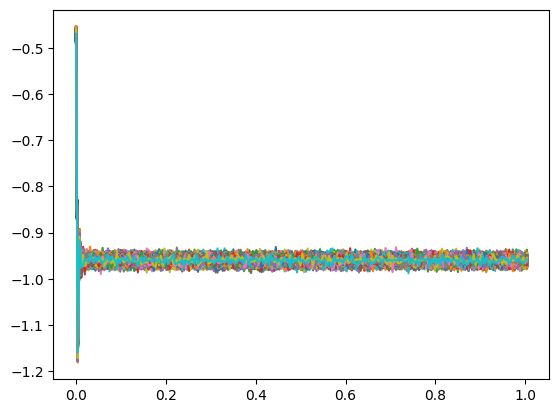

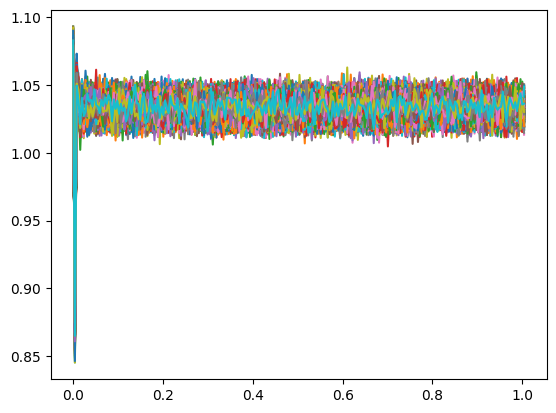

In [28]:
for k in range(1000):
    plt.plot(np.linspace(config.t0, config.t1+config.deltaT, config.ts_length), paths[np.random.choice(np.arange(paths.shape[0]), size=1)[0],:, 0])
plt.show()
plt.close()
for k in range(1000):
    plt.plot(np.linspace(config.t0, config.t1+config.deltaT, config.ts_length), paths[np.random.choice(np.arange(paths.shape[0]), size=1)[0],:, 1])

-0.96839525503129 -0.9514008116744386


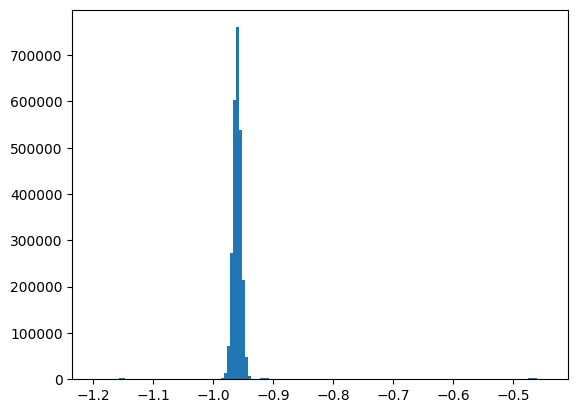

1.0251389251324692 1.0416657339509692


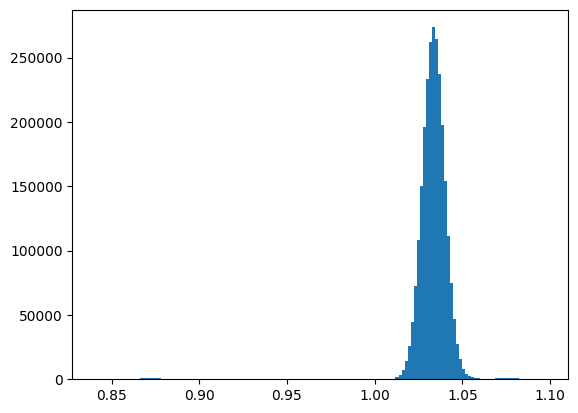

In [31]:
plt.hist(paths[:, :,0].flatten(), bins=150)
print(np.quantile(paths[:,:, 0].flatten(), 0.1), np.quantile(paths[:,:, 0].flatten(), 0.9))
plt.show()
plt.close()
plt.hist(paths[:, :, 1].flatten(), bins=150)
print(np.quantile(paths[:,:, 1].flatten(), 0.1), np.quantile(paths[:,:, 1].flatten(), 0.9))
plt.show()
plt.close()

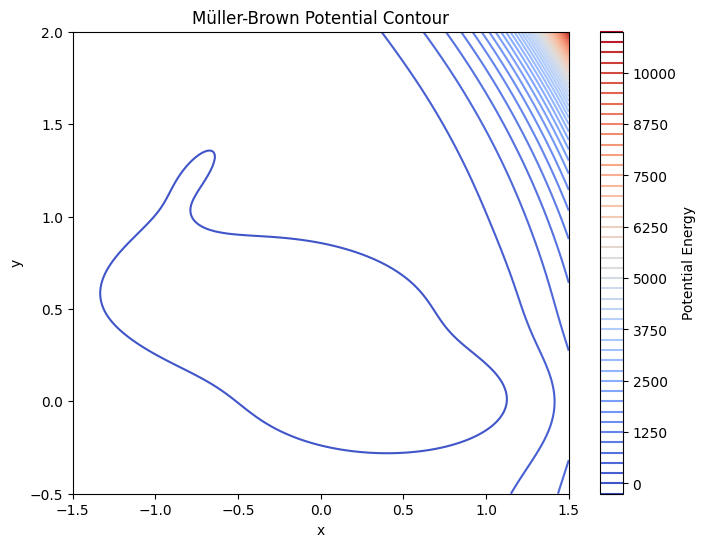

In [13]:
def muller_brown_potential(x, y):
    U = np.zeros_like(x)
    for i in range(4):
        U += config.Aks[i] * np.exp(config.aks[i] * (x - config.X0s[i])**2 + config.bks[i] * (x - config.X0s[i]) * (y - config.Y0s[i]) + config.cks[i] * (y - config.Y0s[i])**2)
    return U

# Create grid
x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-0.5, 2, 200)
X, Y = np.meshgrid(x, y)
Z = muller_brown_potential(X, Y)

# Plot contours
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap="coolwarm")
plt.colorbar(contour, label="Potential Energy")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Müller-Brown Potential Contour")
plt.show()

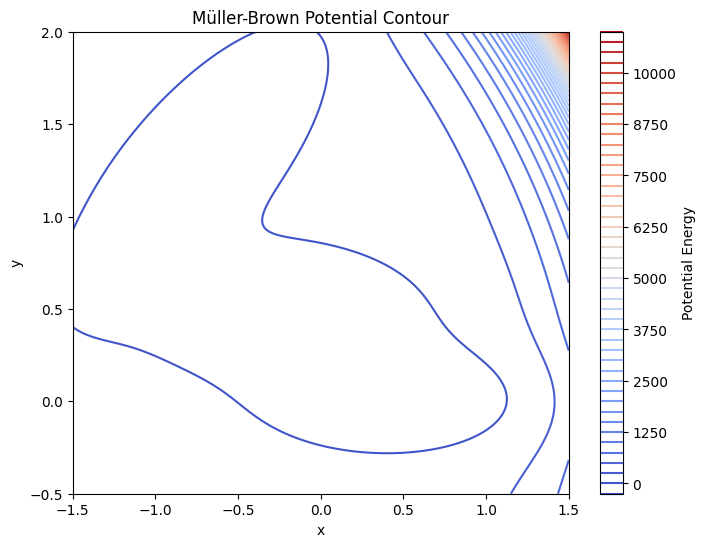

In [65]:
def muller_brown_potential(x, y):
    U = np.zeros_like(x)
    for i in range(4):
        U += config.Aks[i] * np.exp(config.aks[i] * (x - config.X0s[i])**2 + config.bks[i] * (x - config.X0s[i]) * (y - config.Y0s[i]) + config.cks[i] * (y - config.Y0s[i])**2)
    return U

# Create grid
x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-0.5, 2, 200)
X, Y = np.meshgrid(x, y)
Z = muller_brown_potential(X, Y)

# Plot contours
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap="coolwarm")
plt.colorbar(contour, label="Potential Energy")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Müller-Brown Potential Contour")
plt.show()

In [ ]:
paths

In [32]:

from configs.RecursiveVPSDE.LSTM_3DLorenz.recursive_LSTM_PostMeanScore_3DLorenz_T256_H05_tl_110data import get_config

In [33]:
from utils.math_functions import generate_Lorenz63
config = get_config()
paths = generate_Lorenz63(config=config, H=config.hurst,S=10, T=config.ts_length, isUnitInterval=config.t0==1.)

In [34]:
config.data_path

'/Users/marcos/GitHubRepos/FractionalBrownianMotion/data/3DLnz_samples_t00_dT3906e-03_27e+00Beta_28e+00Rho_10e+00Sigma_10Diff_00Init.npy'

In [ ]:
plt.hist(paths[:,:,0].flatten(), bins=150)

In [ ]:
print(config.data_path)